# Imports

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Visualize dataset information
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [15]:
# Visualize first 5 entries
data_head = data.head()
data_head

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


### 1) Load that the "dataset.csv" dataset into a pandas dataframe, and take a look of the data
- import necessary libraries
- import dataset
- verify if there are missing values
- verify if there are outliers in the target variable `charges` (use a boxplot, and the interquartile method)
  - visualize the result using a histogram
- visualize the remaining variables using histograms in subplots

In [22]:
print(data.isnull().sum())

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [23]:
data.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


# Data Cleaning

- In our Dataset it exists atleast some irrelevant columns
- For Example : Employee_ID (Not individual cases for the questions)
- We can check for missing values aswell



In [28]:
# Data Cleaning
# Dropping irrelevant columns (e.g., Employee_ID)
data.drop(columns=['Employee_ID'], inplace=True)


KeyError: "['Employee_ID'] not found in axis"

In [ ]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
Stress_Level_Numeric                    0
Social_Isolation_Rating_Numeric         0
dtype: int64


# Removing Data that has missing values...

In [33]:
critical_columns = ['Mental_Health_Condition', 'Physical_Activity']
data.dropna(subset=critical_columns, inplace=True)

# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64


### testing chatgpt

Dataset Shape: (5000, 20)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition     

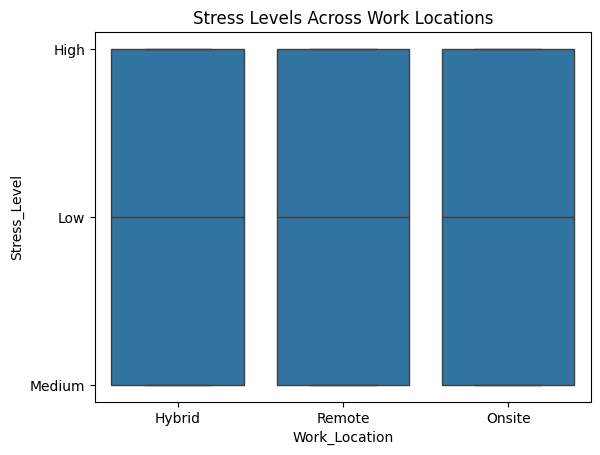

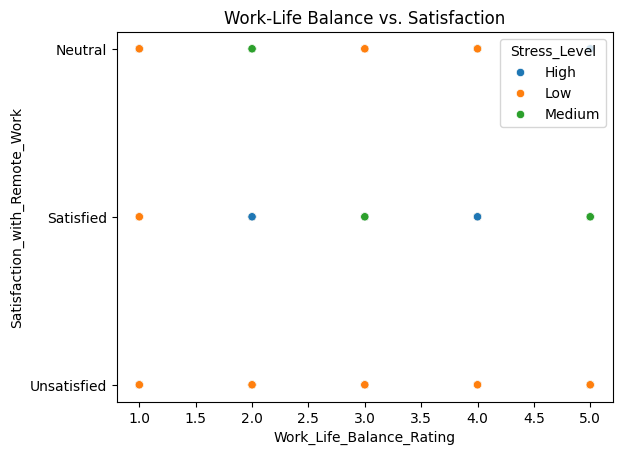

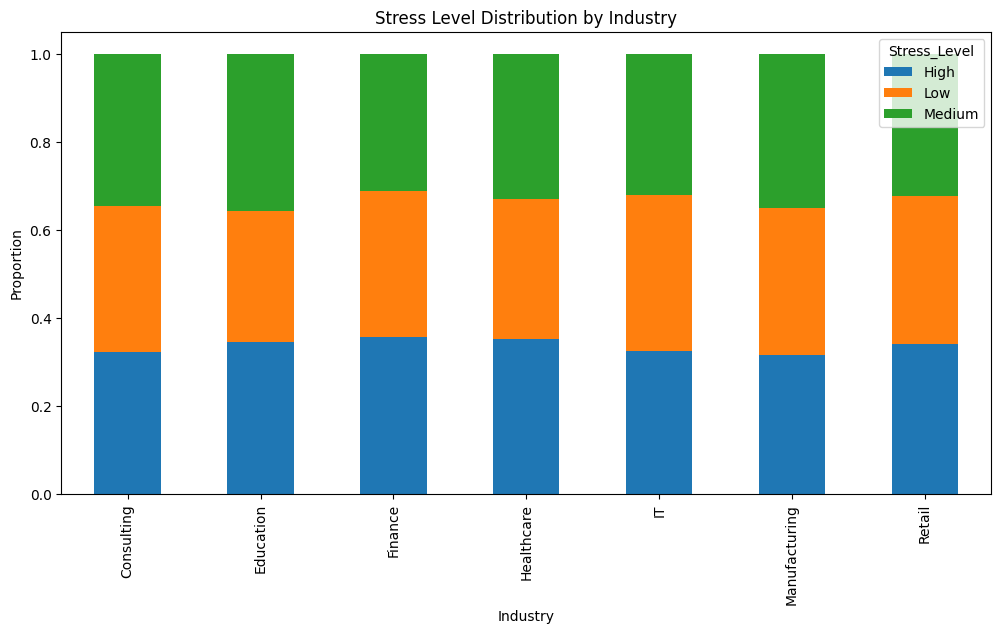


Chi-Square Test for Access to Resources and Productivity:
Chi2: 6.272911668512943 
P-value: 0.04343647147301801


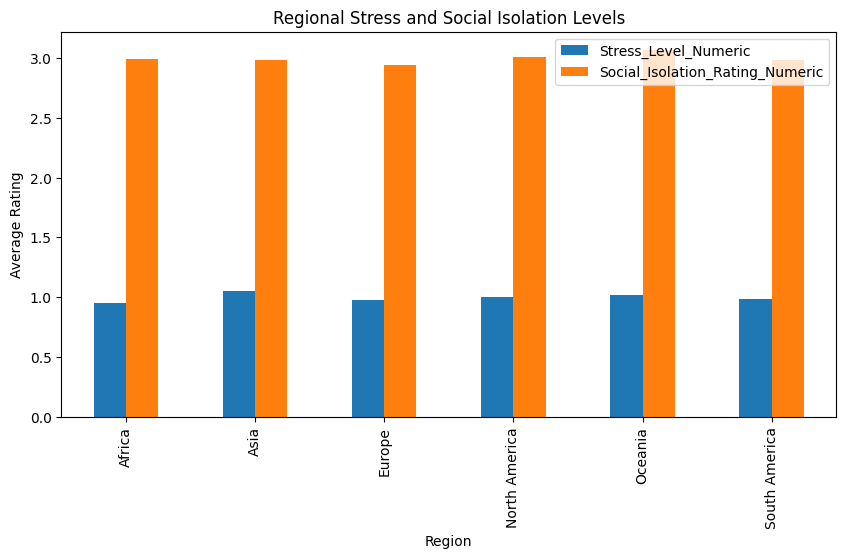

Analysis completed and cleaned dataset saved.


In [ ]:
# Mental Health and Remote Work Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency

# Load the dataset
data_path = 'dataset.csv'  # Replace with your dataset path
df = pd.read_csv(data_path)

# Data Overview
def data_overview(df):
    """Displays basic information about the dataset."""
    print("Dataset Shape:", df.shape)
    print("\nDataset Info:")
    print(df.info())
    print("\nSample Data:")
    print(df.head())

# Initial overview
data_overview(df)

# Data Cleaning
# Dropping irrelevant columns (e.g., Employee_ID)
df.drop(columns=['Employee_ID'], inplace=True)

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handling categorical columns
categorical_columns = ['Stress_Level', 'Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 
                       'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Handling duplicates
df.drop_duplicates(inplace=True)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Exploratory Analysis
# Question 1: Correlation with Stress Levels and Mental Health Conditions
print("\nCorrelation Analysis:")
correlation_cols = ['Hours_Worked_Per_Week', 'Company_Support_for_Remote_Work', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating']
correlations = {}
for col in correlation_cols:
    if col in df.columns:
        corr, _ = pearsonr(df[col], df['Stress_Level'].cat.codes)
        correlations[col] = corr
print("Stress Level Correlations:", correlations)

# Visualization: Stress Levels vs. Work Location
sns.boxplot(x='Work_Location', y='Stress_Level', data=df)
plt.title("Stress Levels Across Work Locations")
plt.show()

# Question 2: Work-life balance and Employee Satisfaction
sns.scatterplot(x='Work_Life_Balance_Rating', y='Satisfaction_with_Remote_Work', hue='Stress_Level', data=df)
plt.title("Work-Life Balance vs. Satisfaction")
plt.show()

# Question 3: Industry and Role Differences
industry_stress = df.groupby('Industry')['Stress_Level'].value_counts(normalize=True).unstack()
industry_stress.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Stress Level Distribution by Industry")
plt.ylabel("Proportion")
plt.show()

# Question 4: Mental Health Resources and Productivity
resources_productivity = pd.crosstab(df['Access_to_Mental_Health_Resources'], df['Productivity_Change'])
chi2, p, dof, ex = chi2_contingency(resources_productivity)
print("\nChi-Square Test for Access to Resources and Productivity:\nChi2:", chi2, "\nP-value:", p)

# Question 5: Regional Stress and Isolation
# Convert 'Stress_Level' and 'Social_Isolation_Rating' to numeric for aggregation
df['Stress_Level_Numeric'] = df['Stress_Level'].cat.codes
df['Social_Isolation_Rating_Numeric'] = pd.to_numeric(df['Social_Isolation_Rating'], errors='coerce')

region_analysis = df.groupby('Region')[['Stress_Level_Numeric', 'Social_Isolation_Rating_Numeric']].mean()
region_analysis.plot(kind='bar', figsize=(10, 5))
plt.title("Regional Stress and Social Isolation Levels")
plt.ylabel("Average Rating")
plt.show()

# Save cleaned data
# DEVEMOS FAZER ISTO?
df.to_csv('cleaned_dataset.csv', index=False)

print("Analysis completed and cleaned dataset saved.")
